### Inícios Musicais:
A noção de um início musical pode ser um tanto vaga e está relacionada a outros conceitos como *ataques* ou *transientes*. O *ataque* de uma nota refere-se à fase em que o som se intensifica, o que tipicamente acompanha um envelope de amplitude que aumenta abruptamente. O conceito relacionado de *transiente* se refere a um componente sonoro similar a ruído, de curta duração e alta amplitude, que normalmente ocorre no início de um tom musical ou de um evento sonoro mais geral. Em contraste com o ataque e o transiente, o início de uma nota refere-se ao instante único (em vez de um período) que marca o começo do *transiente*, ou o ponto temporal mais cedo em que o *transiente* pode ser detectado de forma confiável.

Intuitivamente, a detecção de inícios é a tarefa de determinar os tempos de início das notas ou de outros eventos musicais conforme eles ocorrem. Para detectar inícios de notas no sinal, a ideia geral é capturar mudanças abruptas que frequentemente marcam o começo das regiões transientes. Para notas que têm uma fase de ataque pronunciada, candidatos a início podem ser determinados localizando as posições temporais onde o envelope de amplitude do sinal começa a aumentar.

Abaixo mostramos a forma de onda e espectrograma de um clique, de um som de piano (nota C4) e um violino (nota C4).

In [1]:
import os, sys
import sys
import numpy as np
from scipy import signal
from  matplotlib import pyplot as plt
import librosa
import IPython.display as ipd
import pandas as pd
sys.path.append('..')
import libfmp.b
import libfmp.c2
import libfmp.c6

%matplotlib inline

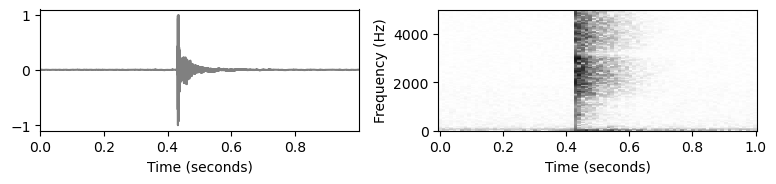

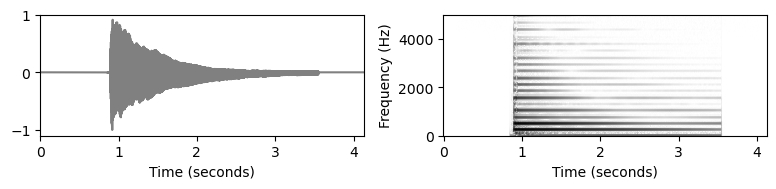

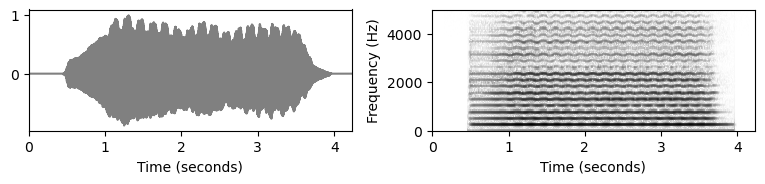

In [15]:
def plot_wav_spectrogram(fn_wav, xlim=None, audio=True):
    """Plota a forma de onda, o espectrograma computado e pode reproduzir o áudio.""" 
    # Define a taxa de amostragem padrão e Carrega o arquivo de áudio
    Fs = 22050  
    x, Fs = librosa.load(fn_wav, sr=Fs)
    
    # Cria a figura
    plt.figure(figsize=(8, 2))
    
    # Plota a forma de onda
    ax = plt.subplot(1, 2, 1)
    libfmp.b.plot_signal(x, Fs, ax=ax)
    
    # Define o limite do eixo x, se especificado
    if xlim is not None: 
        plt.xlim(xlim) 
    
    # Plota o espectrograma
    ax = plt.subplot(1, 2, 2)
    # Define o tamanho da FFT, o tamanho do salto e a janela
    N, H = 512, 256  
    # Calcula a STFT usando a janela de Hann
    X = librosa.stft(x, n_fft=N, hop_length=H, win_length=N, window='hann') 
    # Aplica compressão logarítmica na magnitude do espectrograma
    Y = np.log(1 + 10 * np.abs(X))  
    # Plota o espectrograma
    libfmp.b.plot_matrix(Y, Fs=Fs/H, Fs_F=N/Fs, ax=[ax], colorbar=False)
    # Define o limite do eixo y para o espectrograma
    plt.ylim([0, 5000])  
    # Define o limite do eixo x para o espectrograma, se especificado
    if xlim is not None: 
        plt.xlim(xlim)
    
    plt.tight_layout()
    plt.show()  
    
    # Reproduz o áudio, se especificado
    if audio:  
        ipd.display(ipd.Audio(x, rate=Fs))  

fn_wav = os.path.join('Audios', 'Detecção_de_Ataques_de_Notas_1.wav')
plot_wav_spectrogram(fn_wav)

fn_wav = os.path.join('Audios', 'Detecção_de_Ataques_de_Notas_2.wav')
plot_wav_spectrogram(fn_wav)

fn_wav = os.path.join('Audios', 'Detecção_de_Ataques_de_Notas_3.wav')
plot_wav_spectrogram(fn_wav)

Podemos perceber que quando não há uma fase de ataque clara, como em músicas não percussivas com inícios suaves e transições de notas pouco definidas, a detecção de inícios se torna muito mais desafiadora. Por exemplo, a forma de onda do som de violino acima mostra um aumento lento de energia em vez de uma mudança abrupta como no som de piano. Para sons suaves, é difícil determinar ou mesmo definir a posição exata do início.

A detecção de inícios de notas individuais torna-se ainda mais difícil quando se lida com música polifônica complexa. Eventos sonoros que ocorrem simultaneamente podem resultar em efeitos de mascaramento, em que nenhuma alteração significativa na energia do sinal é mensurável.